In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

In [3]:
# Load the data
try:
    data = pd.read_csv("data.csv")
except FileNotFoundError:
    print("Could not find the input file. Please check the file path and try again.")
    exit()


In [4]:
#convert the data into numpy array
age ,sex = data['age'], data['sex']
cp = data['cp']
Weight = data['Weight']
HR = data['HR']
Smoker = data['Smoker']
FamilyHistory = data['FamilyHistory']
HeartDisease = data['HeartDisease']


In [5]:
systolicBlood  = []
for i in range(len(data)):
    systolicBlood = 50+(0.21*age)+(0.15* Weight)+(1.91*sex)+(0.10*HR)
    systolicBlood.append(systolicBlood)
data['systolicBlood'] = systolicBlood
data.head()

/tmp/ipykernel_11088/839078614.py:4: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  systolicBlood.append(systolicBlood)


,age,sex,cp,Weight,HR,Smoker,FamilyHistory,HeartDisease,HeartAttackHistory,systolicBlood
0,50,1,1,80.0,72,0,1,0,1,81.61
1,42,0,0,65.0,85,1,0,1,0,77.07
2,55,1,0,90.0,65,0,1,1,1,83.46
3,38,0,1,72.0,90,0,0,0,0,77.78
4,63,1,1,78.0,75,1,1,1,1,84.34


In [24]:
systolicBlood.describe()

count    1321.000000
mean       81.756344
std         3.788684
min        71.710000
25%        78.940000
50%        81.570000
75%        84.430000
max        91.990000
Name: systolicBlood, dtype: float64

In [6]:
# DiastolicBlood = 23 + (0.14 x age) + (0.15 x weight in kg) + (1.46 x sex) - (0.01 x heart rate)
DiastolicBlood  = []
for i in range(len(data)):
    DiastolicBlood = 23 + (0.14 * age) + (1.15 * Weight) + (1.46 * sex) - (0.01 * HR)
    DiastolicBlood.append(DiastolicBlood)
data['DiastolicBlood'] = DiastolicBlood
data.head()

/tmp/ipykernel_11088/1370504255.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  DiastolicBlood.append(DiastolicBlood)


,age,sex,cp,Weight,HR,Smoker,FamilyHistory,HeartDisease,HeartAttackHistory,systolicBlood,DiastolicBlood
0,50,1,1,80.0,72,0,1,0,1,81.61,122.74
1,42,0,0,65.0,85,1,0,1,0,77.07,102.78
2,55,1,0,90.0,65,0,1,1,1,83.46,135.01
3,38,0,1,72.0,90,0,0,0,0,77.78,110.22
4,63,1,1,78.0,75,1,1,1,1,84.34,122.23


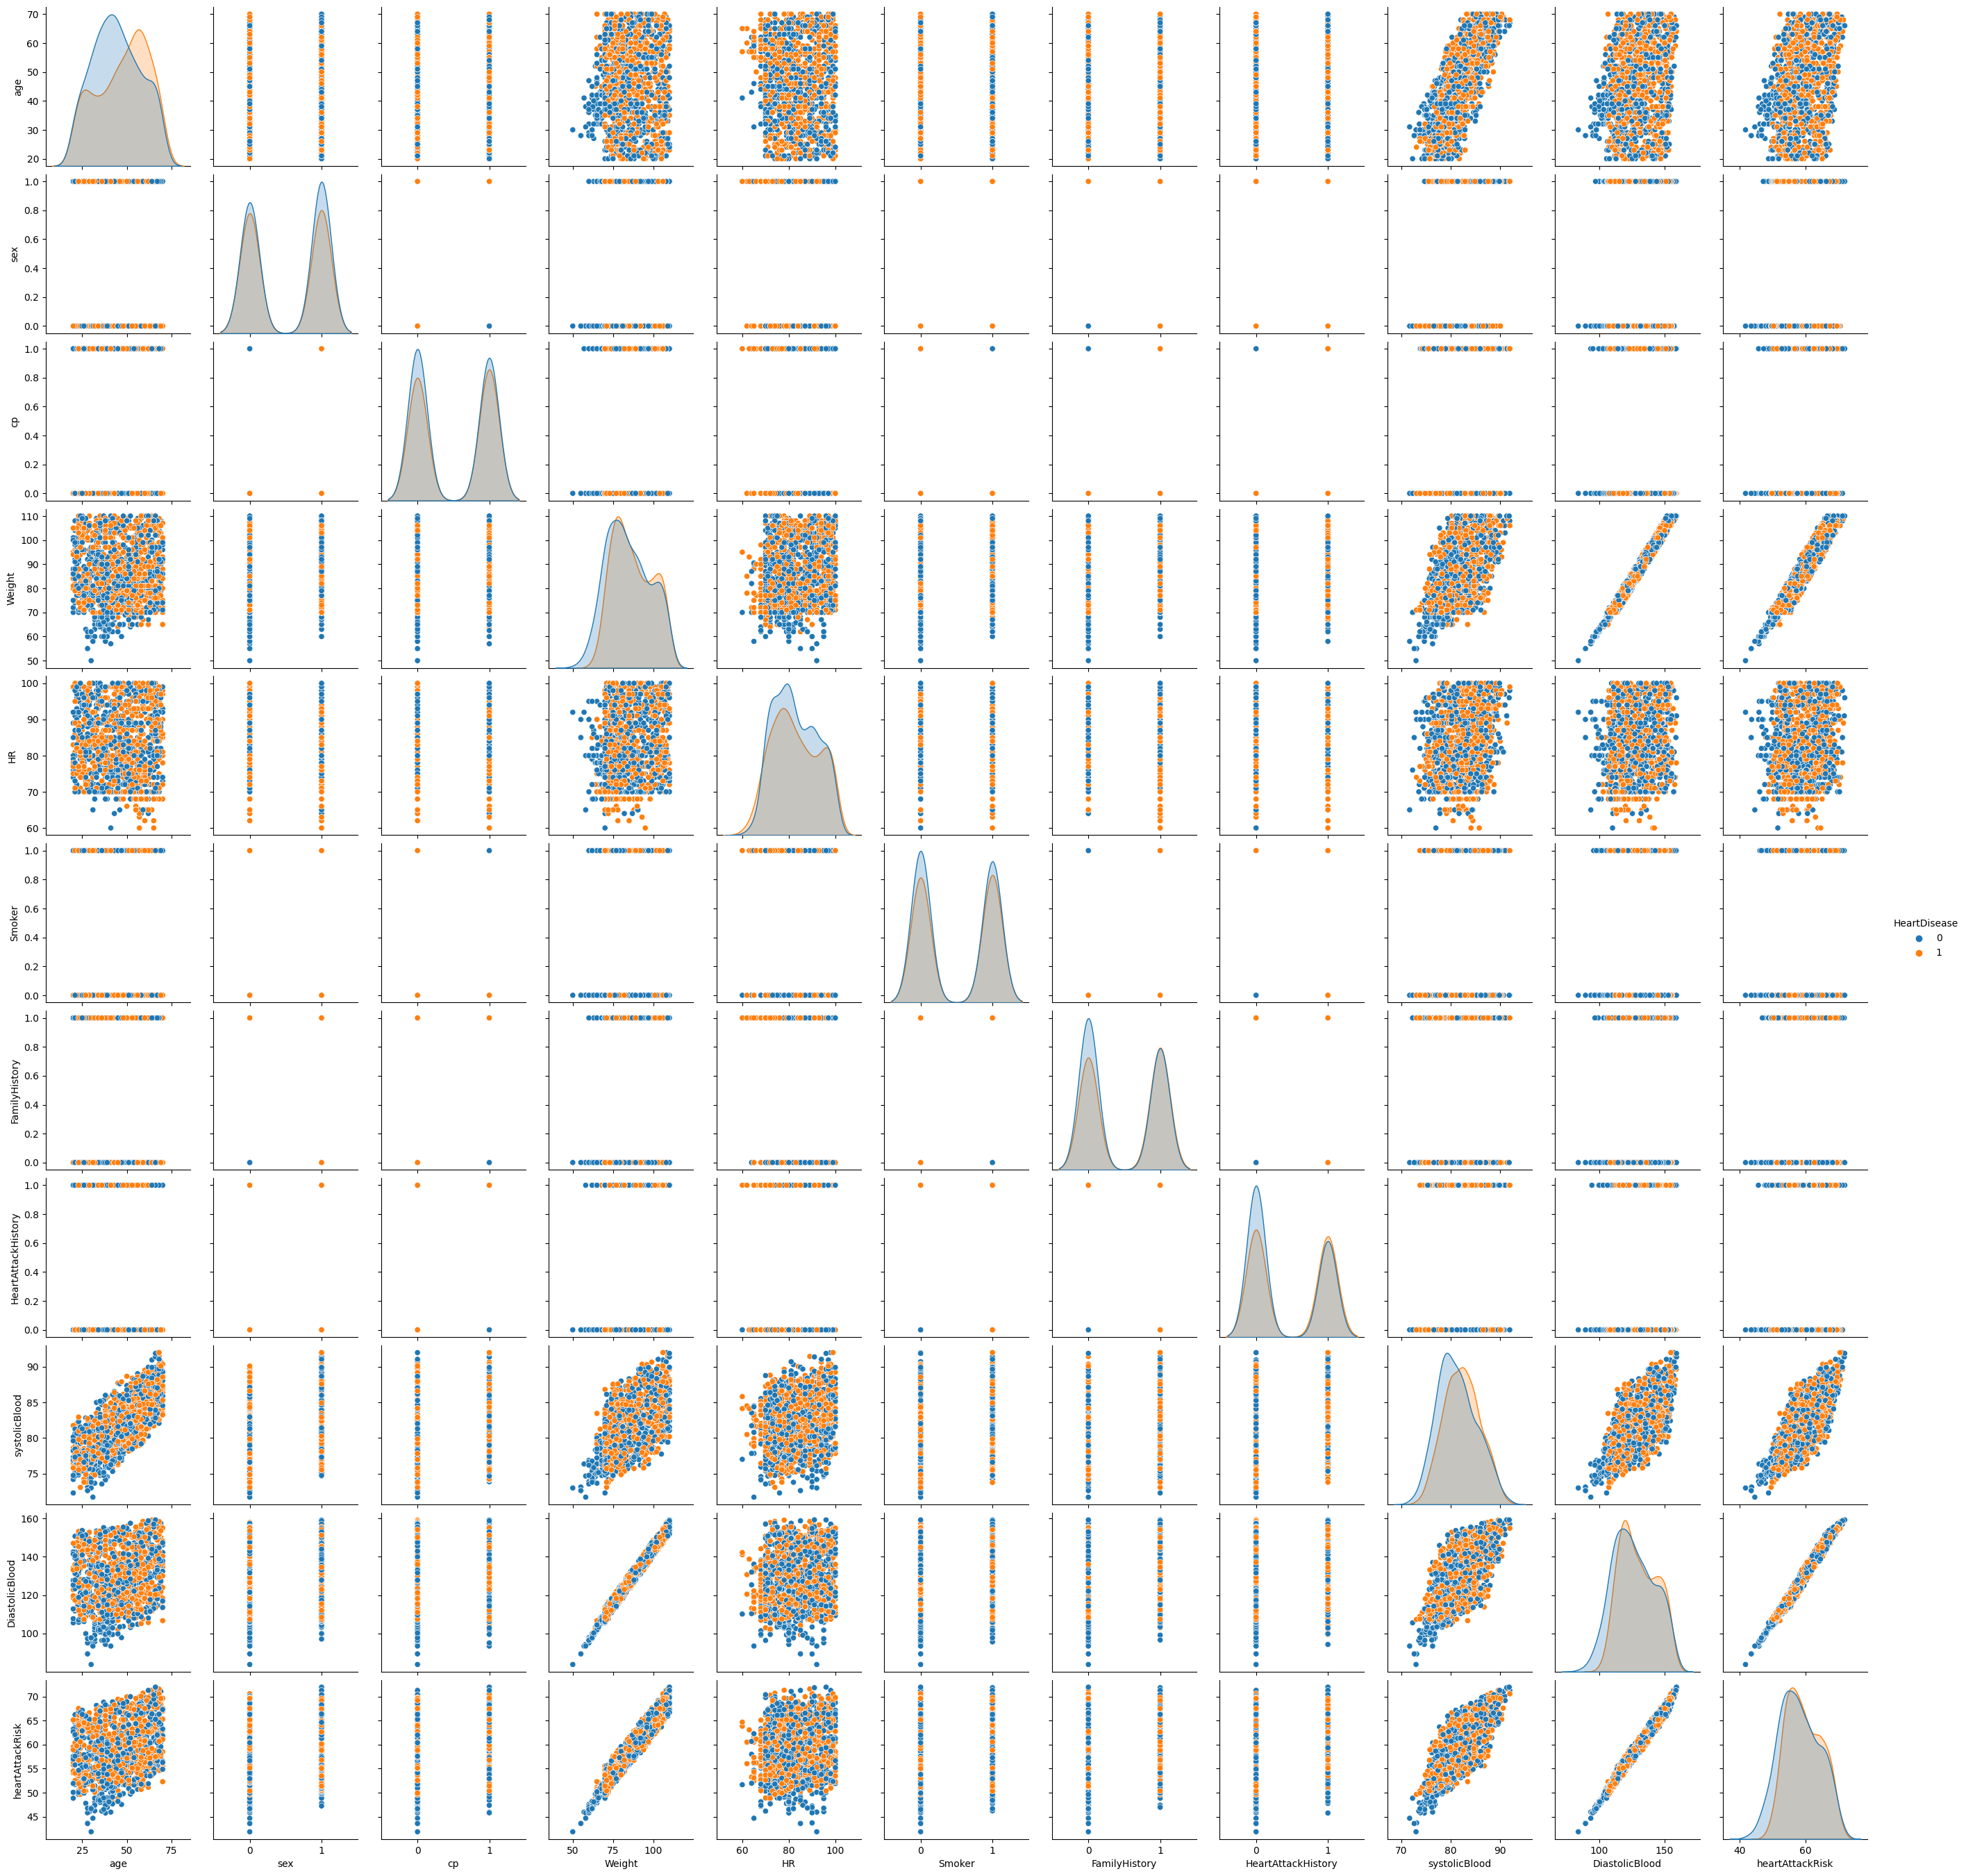

In [25]:
#plot in seaborn all the features
sns.pairplot(data, hue='HeartDisease')

In [7]:
systolicBlood = data['systolicBlood']
DiastolicBlood = data['DiastolicBlood']

In [8]:
#create a formula to calculate heart attack risk with the help of systolic blood pressure and diastolic blood pressure in percentage
heartAttackRisk = []
for i in range(len(data)):
    heartAttackRisk = (0.276 * systolicBlood) + (0.33 * DiastolicBlood) - 5.93
    print(heartAttackRisk)
    heartAttackRisk.append(heartAttackRisk)
data['heartAttackRisk'] = heartAttackRisk
data.head()


0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920


/tmp/ipykernel_11088/336805604.py:6: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  heartAttackRisk.append(heartAttackRisk)


0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920
1318    52.91026
1319    67.52440
1320    56.79802
Length: 1321, dtype: float64
0       57.09856
1       49.25872
2       61.65826
3       51.90988
4       57.68374
          ...   
1316    55.13938
1317    66.29920


,age,sex,cp,Weight,HR,Smoker,FamilyHistory,HeartDisease,HeartAttackHistory,systolicBlood,DiastolicBlood,heartAttackRisk
0,50,1,1,80.0,72,0,1,0,1,81.61,122.74,57.09856
1,42,0,0,65.0,85,1,0,1,0,77.07,102.78,49.25872
2,55,1,0,90.0,65,0,1,1,1,83.46,135.01,61.65826
3,38,0,1,72.0,90,0,0,0,0,77.78,110.22,51.90988
4,63,1,1,78.0,75,1,1,1,1,84.34,122.23,57.68374


In [23]:
#save the data in csv file
data.to_csv('test.csv', index=False)



[ 540   43  877 ...  191 1193  514]


ValueError: y should be a 1d array, got an array of shape (1321, 4) instead.

In [1]:
#encode the target variable to convert it into numerical form
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

NameError: name 'preprocessing' is not defined

In [15]:
#get ready to train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
#predict the model
y_pred = model.predict(X_test)
#check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))




ValueError: Unknown label type: 'continuous'

In [ ]:
#check the accuracy of the model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))


In [ ]:
#save the model in dp
import pickle
pickle.dump(model, open('model.pkl','wb'))


In [ ]:
#load the model
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[50,1,70,80]]))
